In [36]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

In [37]:
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = 'catto.png'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

In [38]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02104365', 'schipperke', 0.30305293), ('n04265275', 'space_heater', 0.28295416), ('n02124075', 'Egyptian_cat', 0.13652034)]


In [39]:
np.argmax(preds[0])

223

In [40]:
from keras import backend as K
import tensorflow

tensorflow.compat.v1.disable_eager_execution()

catto_output = model.output[:, 223]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(catto_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

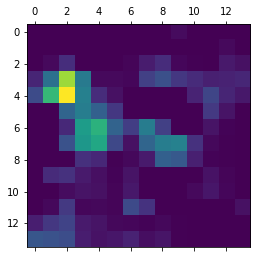

In [41]:
from matplotlib import pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [42]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('catto1.jpg', superimposed_img)

True